#  Real Estate (PySpark): DE2 Assessment
## Pre-Requisites
### Install pyspark


In [2]:
%pip install pyspark

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.5/200.5 kB 2.6 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


### Create a SparkSession

In [5]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F

In [6]:
spark = SparkSession.builder.appName("DE2").getOrCreate()

## Question 1: Import the Real Estate Sales Parquet File into a Spark DataFrame object

Make sure your add the `Real_Estate_Sales_2001-2020_GL.parquet` file to your current working directory

In [8]:
file_location = './Real_Estate_Sales_2001-2020_GL.parquet'

In [9]:
# write your solution here
df = spark.read.parquet(file_location)
df.show()

+-------------+---------+-------------+----------+--------------------+--------------+-----------+-----------+-------------+----------------+------------------+--------------------+-----------+--------------------+
|serial_number|list_year|date_recorded|      town|             address|assessed_value|sale_amount|sales_ratio|property_type|residential_type|      non_use_code|    assessor_remarks|opm_remarks|            location|
+-------------+---------+-------------+----------+--------------------+--------------+-----------+-----------+-------------+----------------+------------------+--------------------+-----------+--------------------+
|      2020348|     2020|   09/13/2021|   Ansonia|     230 WAKELEE AVE|      150500.0|   325000.0|      0.463|   Commercial|            NULL|              NULL|                NULL|       NULL|                NULL|
|        20002|     2020|   10/02/2020|   Ashford|     390 TURNPIKE RD|      253000.0|   430000.0|     0.5883|  Residential|   Single Family

## Question 2: (A) Display a list of the columns in the Spark DataFrame and then (B) print the first 5 rows 

In [10]:
# A. list of columns
df.printSchema()

root
 |-- serial_number: long (nullable = true)
 |-- list_year: long (nullable = true)
 |-- date_recorded: string (nullable = true)
 |-- town: string (nullable = true)
 |-- address: string (nullable = true)
 |-- assessed_value: double (nullable = true)
 |-- sale_amount: double (nullable = true)
 |-- sales_ratio: double (nullable = true)
 |-- property_type: string (nullable = true)
 |-- residential_type: string (nullable = true)
 |-- non_use_code: string (nullable = true)
 |-- assessor_remarks: string (nullable = true)
 |-- opm_remarks: string (nullable = true)
 |-- location: string (nullable = true)



In [11]:
# B. first 5 rows
df.show(n=5)

+-------------+---------+-------------+-------+--------------------+--------------+-----------+-----------+-------------+----------------+------------+----------------+-----------+--------+
|serial_number|list_year|date_recorded|   town|             address|assessed_value|sale_amount|sales_ratio|property_type|residential_type|non_use_code|assessor_remarks|opm_remarks|location|
+-------------+---------+-------------+-------+--------------------+--------------+-----------+-----------+-------------+----------------+------------+----------------+-----------+--------+
|      2020348|     2020|   09/13/2021|Ansonia|     230 WAKELEE AVE|      150500.0|   325000.0|      0.463|   Commercial|            NULL|        NULL|            NULL|       NULL|    NULL|
|        20002|     2020|   10/02/2020|Ashford|     390 TURNPIKE RD|      253000.0|   430000.0|     0.5883|  Residential|   Single Family|        NULL|            NULL|       NULL|    NULL|
|       200212|     2020|   03/09/2021|   Avon|   

## Question 3: Convert the `date_recorded` column to a date field 

In [44]:
from pyspark.sql.functions import to_date

# write your solution here
df = df.select('serial_number'\
                   , 'list_year'\
                   , to_date(F.col('date_recorded'), 'MM/dd/yyyy').alias('date_recorded')\
                   , 'town'\
                   , 'address'\
                   , 'assessed_value'\
                   , 'sale_amount'\
                   , 'sales_ratio'\
                   , 'property_type'\
                   , 'residential_type'\
                   , 'non_use_code'\
                   , 'assessor_remarks'\
                   , 'opm_remarks'\
                   , 'location')
df.show(n=5)

+-------------+---------+-------------+-------+--------------------+--------------+-----------+-----------+-------------+----------------+------------+----------------+-----------+--------+
|serial_number|list_year|date_recorded|   town|             address|assessed_value|sale_amount|sales_ratio|property_type|residential_type|non_use_code|assessor_remarks|opm_remarks|location|
+-------------+---------+-------------+-------+--------------------+--------------+-----------+-----------+-------------+----------------+------------+----------------+-----------+--------+
|      2020348|     2020|   2021-09-13|Ansonia|     230 WAKELEE AVE|      150500.0|   325000.0|      0.463|   Commercial|            NULL|        NULL|            NULL|       NULL|    NULL|
|        20002|     2020|   2020-10-02|Ashford|     390 TURNPIKE RD|      253000.0|   430000.0|     0.5883|  Residential|   Single Family|        NULL|            NULL|       NULL|    NULL|
|       200212|     2020|   2021-03-09|   Avon|   

## Question 4: How many `Condo` listings are in the dataset? 

In [45]:
# write your solution here
df.filter(F.col('property_type')=='Condo').count()

105420

## Question 5: What is the average sales price by `property_type`, sorted by most expensive to least expensive?

In [46]:
# write your solution here
df.groupBy('property_type').agg(F.avg('sale_amount').alias('sale_amount')).orderBy('sale_amount').show()

+--------------+-------------------+
| property_type|        sale_amount|
+--------------+-------------------+
|  Three Family|  179844.5162084856|
|    Two Family| 199044.60727090278|
|         Condo| 260210.99107920696|
|   Vacant Land|  295701.5733797028|
|   Four Family|  314291.0358139535|
|Public Utility|           369708.8|
| Single Family| 388514.26217217103|
|          NULL|   413434.227984552|
|   Residential|  479356.2113586813|
|    Commercial| 1788884.2746239274|
|    Industrial| 2004287.4122807018|
|    Apartments|1.283430699382716E7|
+--------------+-------------------+



## Question 6: How many properties sold for higher than their assessed value?

In [47]:
# write your solution here
df.filter(F.col('sale_amount')>F.col('assessed_value')).count()

863941

## Question 7: How have real estate sale prices changed over time?
(This question is intentionally vague, use your creativity to intepret and answer accordingly!)

In [61]:
# pull year and sales prices
new_df = df.select('date_recorded', 'sale_amount')
new_df.show()

+-------------+-----------+
|date_recorded|sale_amount|
+-------------+-----------+
|   2021-09-13|   325000.0|
|   2020-10-02|   430000.0|
|   2021-03-09|   179900.0|
|   2021-04-13|   890000.0|
|   2021-07-02|  1447500.0|
|   2020-12-09|  1250000.0|
|   2021-03-01|   130000.0|
|   2021-07-01|   677500.0|
|   2021-06-04|   795000.0|
|   2020-12-16|   335000.0|
|   2021-08-10|   352000.0|
|   2021-09-13|   250000.0|
|   2021-01-22|   700000.0|
|   2021-09-28|   650000.0|
|   2021-09-09|   249900.0|
|   2020-10-08|   155000.0|
|   2020-12-29|   299000.0|
|   2021-03-01|   183000.0|
|   2021-08-23|    91000.0|
|   2020-11-05|   160000.0|
+-------------+-----------+
only showing top 20 rows



In [62]:
from pyspark.sql.functions import year
new_df = new_df.withColumn('year', year('date_recorded'))
new_df = new_df.select('year', 'sale_amount')
new_df.show()

+----+-----------+
|year|sale_amount|
+----+-----------+
|2021|   325000.0|
|2020|   430000.0|
|2021|   179900.0|
|2021|   890000.0|
|2021|  1447500.0|
|2020|  1250000.0|
|2021|   130000.0|
|2021|   677500.0|
|2021|   795000.0|
|2020|   335000.0|
|2021|   352000.0|
|2021|   250000.0|
|2021|   700000.0|
|2021|   650000.0|
|2021|   249900.0|
|2020|   155000.0|
|2020|   299000.0|
|2021|   183000.0|
|2021|    91000.0|
|2020|   160000.0|
+----+-----------+
only showing top 20 rows



In [71]:
# group by year and avg sales amount, sort by year, then convert to pandas df
pandas_df = new_df.groupBy('year').agg(F.avg('sale_amount').alias('sale_amount'))\
            .sort('year')\
            .toPandas()
pandas_df

,year,sale_amount
0,NaN,0.000000
1,1999.0,95000.000000
2,2001.0,222403.153453
3,2002.0,259165.455628
4,2003.0,305491.023758
5,2004.0,340289.282380
6,2005.0,379726.618191
7,2006.0,377261.421467
8,2007.0,481645.910408
9,2008.0,412965.585787


In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

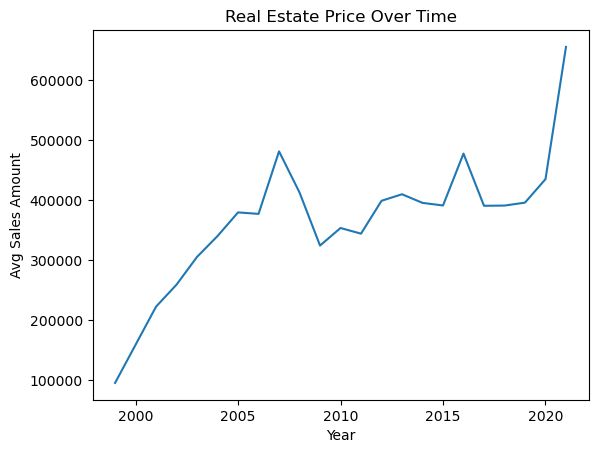

In [74]:
sns.lineplot(pandas_df, x='year', y='sale_amount')
plt.xlabel('Year')
plt.ylabel('Avg Sales Amount')
plt.title('Real Estate Price Over Time')
plt.show()